<a href="https://colab.research.google.com/github/pirumba/computer_vision/blob/main/cropsknnclassfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
 from skimage.io import imshow, imread
 from skimage.color import rgb2gray
 from skimage.filters import threshold_mean
 from skimage.morphology import closing
 from skimage.measure import label, regionprops, regionprops_table
 from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import classification_report
 from matplotlib import pyplot as plt
 import pandas as pd
 import numpy as np
 from tqdm import tqdm 
 import os

In [68]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


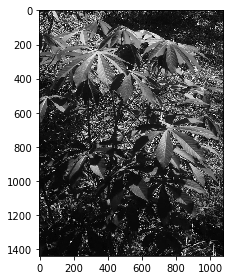

In [69]:
 # get the filenames of the leaves under the directory “Leaves”
path = "/content/drive/MyDrive/cropped/unknown/"
image_path_list = os.listdir(path)
 # looking at the first image
i = 0
image_path = image_path_list[i]
image = rgb2gray(imread(path+image_path))
imshow((image))

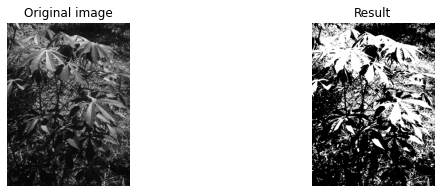

In [70]:
thresh = threshold_mean(image)
binary = image > thresh
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


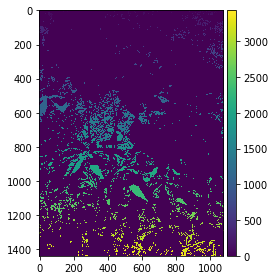

In [71]:
label_img = label(binary)
imshow(label_img)

In [72]:
table = pd.DataFrame(regionprops_table(label_img, image,
                                       ['convex_area', 'area',
                                        'eccentricity', 'extent',                   
                                        'inertia_tensor','perimeter',
                                        'major_axis_length', 
                                        'minor_axis_length']))
table['convex_ratio'] = table['area']/table['convex_area']
table['label'] = image_path[2]
table

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,perimeter,major_axis_length,minor_axis_length,convex_ratio,label
0,27,24,0.940274,0.666667,5.789931,0.737847,0.737847,0.789931,18.621320,9.713118,3.306527,0.888889,a
1,5173,2670,0.832460,0.360227,330.123247,-205.199636,-205.199636,641.635456,1258.513852,109.068566,60.433328,0.516142,a
2,12,11,0.962281,0.785714,3.057851,-0.115702,-0.115702,0.231405,10.207107,7.000091,1.904422,0.916667,a
3,829509,420564,0.889491,0.323762,88506.067096,-53351.999427,-53351.999427,75690.446751,81033.656983,1474.224850,673.650736,0.507004,a
4,49,39,0.939441,0.500000,9.835634,-3.368836,-3.368836,2.642998,28.899495,13.366855,4.580973,0.795918,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,3,3,1.000000,1.000000,0.666667,-0.000000,-0.000000,0.000000,1.000000,3.265986,0.000000,1.000000,a
3429,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,a
3430,2,2,1.000000,1.000000,0.250000,-0.000000,-0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,a
3431,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,a


In [73]:
image_path_list = os.listdir(path)
df = pd.DataFrame()
for i in range(len(image_path_list)):
   
  image_path = image_path_list[i]
  image = rgb2gray(imread(path+image_path))
  thresh = threshold_mean(image)
  binary = image > thresh
  binary = closing(binary)
  label_img = label(binary)
  
  table = pd.DataFrame(regionprops_table(label_img, image,
                          ['convex_area', 'area', 'eccentricity',
                           'extent', 'inertia_tensor',                         
                           'major_axis_length', 'minor_axis_length',
                           'perimeter', 'solidity', 'image',
                           'orientation', 'moments_central',
                           'moments_hu', 'euler_number',
                           'equivalent_diameter',
                           'mean_intensity', 'bbox']))
  table['perimeter_area_ratio'] = table['perimeter']/table['area']
  real_images = []
  std = []
  mean = []
  percent25 = []
  percent75 = []
  for prop in regionprops(label_img): 
      
      min_row, min_col, max_row, max_col = prop.bbox
      img = image[min_row:max_row,min_col:max_col]
      real_images += [img]
      mean += [np.mean(img)]
      std += [np.std(img)]
      percent25 += [np.percentile(img, 25)] 
      percent75 += [np.percentile(img, 75)]
  table['real_images'] = real_images
  table['mean_intensity'] = mean
  table['std_intensity'] = std
  table['25th Percentile'] = mean
  table['75th Percentile'] = std
  table['iqr'] = table['75th Percentile'] - table['25th Percentile']
  table['label'] = image_path[5]
  df = pd.concat([df, table], axis=0)
df.head()

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,bbox-1,bbox-2,bbox-3,perimeter_area_ratio,real_images,std_intensity,25th Percentile,75th Percentile,iqr,label
0,27,24,0.940274,0.666667,5.789931,0.737847,0.737847,0.789931,9.713118,3.306527,...,0,4,9,0.775888,"[[0.5315184313725491, 0.44916549019607843, 0.5...",0.288824,0.394500,0.288824,-0.105676,5
1,7912,4856,0.866272,0.440533,297.745505,-110.591368,-110.591368,1119.829493,134.726209,67.305636,...,0,151,73,0.303231,"[[0.5315184313725491, 0.44916549019607843, 0.5...",0.236146,0.307000,0.236146,-0.070853,5
2,12,11,0.962281,0.785714,3.057851,-0.115702,-0.115702,0.231405,7.000091,1.904422,...,46,2,53,0.927919,"[[0.2658113725490196, 0.31679176470588233, 0.3...",0.125896,0.317403,0.125896,-0.191507,5
3,854865,460568,0.882067,0.354559,89699.548164,-52603.777064,-52603.777064,76776.653505,1476.413111,695.574260,...,0,1205,1078,0.137302,"[[0.5315184313725491, 0.44916549019607843, 0.5...",0.224793,0.273222,0.224793,-0.048428,5
4,49,40,0.939494,0.512821,9.824375,-3.296250,-3.296250,2.577500,13.326282,4.565108,...,138,6,151,0.713020,"[[0.38981960784313724, 0.6996235294117648, 0.8...",0.283637,0.351913,0.283637,-0.068276,5


In [74]:
X = df.drop(columns=['label', 'image', 'real_images'])
#features
X = X[['iqr','75th Percentile','inertia_tensor-1-1',
       'std_intensity','mean_intensity','25th Percentile',
       'minor_axis_length', 'solidity', 'eccentricity']]
#target
y = df['label']
columns = X.columns
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.10, random_state=123, stratify=y)

In [75]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 61.12833230006199


In [76]:
print(f"Test Accuracy: {np.mean(gnb.predict(X_test) ==y_test)*100:.2f}%")

Test Accuracy: 61.13%


In [77]:
#print confusion matrix of test set
print(classification_report(gnb.predict(X_test), y_test))

              precision    recall  f1-score   support

           4       0.56      0.73      0.63       241
           5       0.84      0.58      0.69       928
           6       0.41      0.61      0.49       444

    accuracy                           0.61      1613
   macro avg       0.60      0.64      0.60      1613
weighted avg       0.68      0.61      0.63      1613



Text(0.5, 1.0, 'Accuracy Score: 0.6112833230006199')

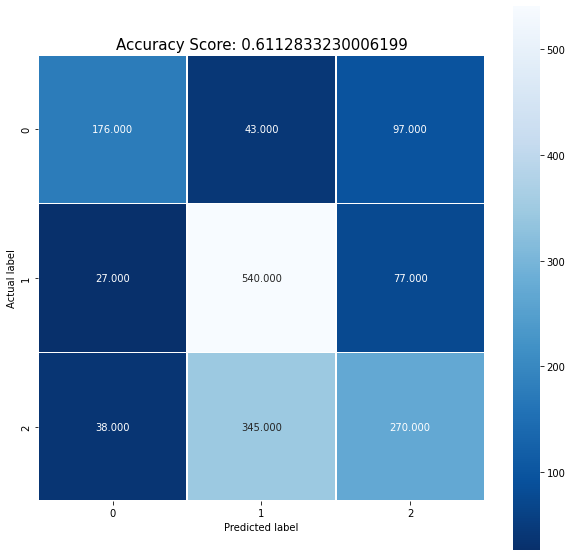

In [78]:
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix # metrics error
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title,size=15)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
KNeighborsClassifier(...)
print(knn.predict(X_test))

['4' '4' '6' ... '4' '5' '5']


In [80]:
print(f"Test Accuracy: {np.mean(knn.score(X_test,y_test))*100:.2f}%")

Test Accuracy: 65.72%


In [81]:
print(knn.predict_proba(X_test))

[[1.         0.         0.        ]
 [0.66666667 0.         0.33333333]
 [0.         0.         1.        ]
 ...
 [0.33333333 0.33333333 0.33333333]
 [0.         1.         0.        ]
 [0.         1.         0.        ]]


In [82]:
#print confusion matrix of test set
print(classification_report(knn.predict(X_test), y_test))

              precision    recall  f1-score   support

           4       0.73      0.69      0.71       334
           5       0.65      0.67      0.66       630
           6       0.63      0.63      0.63       649

    accuracy                           0.66      1613
   macro avg       0.67      0.66      0.67      1613
weighted avg       0.66      0.66      0.66      1613



In [83]:
# make prediction on entire test data
predictions = knn.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix # metrics error
%time
# 98%
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs
KNN Accuracy: 0.657


In [85]:
# to create nice confusion metrics
import seaborn as sns

Text(0.5, 1.0, 'Accuracy Score: 0.657160570365778')

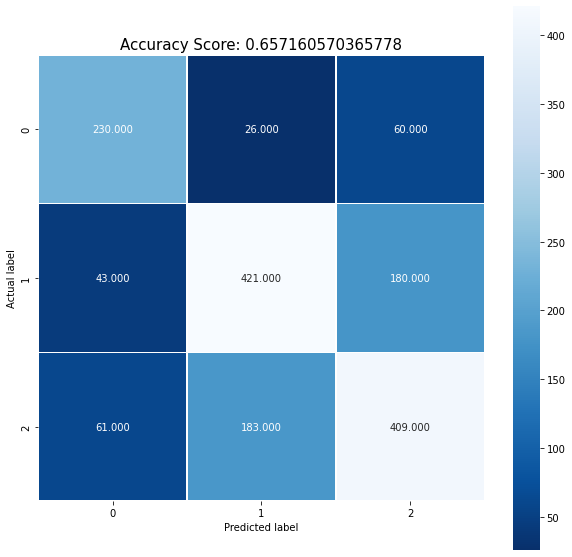

In [86]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)